In [16]:
import clr, os, winreg
from itertools import islice

# This boilerplate requires the 'pythonnet' module.
# The following instructions are for installing the 'pythonnet' module via pip:
#    1. Ensure you are running a Python version compatible with PythonNET. Check the article "ZOS-API using Python.NET" or
#    "Getting started with Python" in our knowledge base for more details.
#    2. Install 'pythonnet' from pip via a command prompt (type 'cmd' from the start menu or press Windows + R and type 'cmd' then enter)
#
#        python -m pip install pythonnet

# determine the Zemax working directory
aKey = winreg.OpenKey(winreg.ConnectRegistry(None, winreg.HKEY_CURRENT_USER), r"Software\Zemax", 0, winreg.KEY_READ)
zemaxData = winreg.QueryValueEx(aKey, 'ZemaxRoot')
NetHelper = os.path.join(os.sep, zemaxData[0], r'ZOS-API\Libraries\ZOSAPI_NetHelper.dll')
winreg.CloseKey(aKey)

# add the NetHelper DLL for locating the OpticStudio install folder
clr.AddReference(NetHelper)
import ZOSAPI_NetHelper

pathToInstall = ''
# uncomment the following line to use a specific instance of the ZOS-API assemblies
#pathToInstall = r'C:\C:\Program Files\Zemax OpticStudio'

# connect to OpticStudio
success = ZOSAPI_NetHelper.ZOSAPI_Initializer.Initialize(pathToInstall);

zemaxDir = ''
if success:
    zemaxDir = ZOSAPI_NetHelper.ZOSAPI_Initializer.GetZemaxDirectory();
    print('Found OpticStudio at:   %s' + zemaxDir);
else:
    raise Exception('Cannot find OpticStudio')

# load the ZOS-API assemblies
clr.AddReference(os.path.join(os.sep, zemaxDir, r'ZOSAPI.dll'))
clr.AddReference(os.path.join(os.sep, zemaxDir, r'ZOSAPI_Interfaces.dll'))
import ZOSAPI

TheConnection = ZOSAPI.ZOSAPI_Connection()
if TheConnection is None:
    raise Exception("Unable to intialize NET connection to ZOSAPI")

TheApplication = TheConnection.ConnectAsExtension(0)
if TheApplication is None:
    raise Exception("Unable to acquire ZOSAPI application")

if TheApplication.IsValidLicenseForAPI == False:
    raise Exception("License is not valid for ZOSAPI use.  Make sure you have enabled 'Programming > Interactive Extension' from the OpticStudio GUI.")

TheSystem = TheApplication.PrimarySystem
if TheSystem is None:
    raise Exception("Unable to acquire Primary system")

def reshape(data, x, y, transpose = False):
    """Converts a System.Double[,] to a 2D list for plotting or post processing
    
    Parameters
    ----------
    data      : System.Double[,] data directly from ZOS-API 
    x         : x width of new 2D list [use var.GetLength(0) for dimension]
    y         : y width of new 2D list [use var.GetLength(1) for dimension]
    transpose : transposes data; needed for some multi-dimensional line series data
    
    Returns
    -------
    res       : 2D list; can be directly used with Matplotlib or converted to
                a numpy array using numpy.asarray(res)
    """
    if type(data) is not list:
        data = list(data)
    var_lst = [y] * x;
    it = iter(data)
    res = [list(islice(it, i)) for i in var_lst]
    if transpose:
        return self.transpose(res);
    return res
    
def transpose(data):
    """Transposes a 2D list (Python3.x or greater).  
    
    Useful for converting mutli-dimensional line series (i.e. FFT PSF)
    
    Parameters
    ----------
    data      : Python native list (if using System.Data[,] object reshape first)    
    
    Returns
    -------
    res       : transposed 2D list
    """
    if type(data) is not list:
        data = list(data)
    return list(map(list, zip(*data)))

print('Connected to OpticStudio')

# The connection should now be ready to use.  For example:
print('Serial #: ', TheApplication.SerialCode)

Found OpticStudio at:   %sc:\program files\ansys zemax opticstudio 2023 r2.00
Connected to OpticStudio
Serial #:  A1154551


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd

In [3]:
file_path = 'D:/AI_Alignment/data/data' ## 뒤에 알맞은 수를 붙이면 됨

In [4]:
f = open('D:/AI_Alignment/data/predicted_file_number.txt', 'r')
data_number = f.read().splitlines()


In [5]:
error_path = []
predicted_error_path =[]
for i in range(len(data_number)) :
    full_path_error = file_path + data_number[i] + '/error.txt'
    error_path.append(full_path_error)
    full_path_predict = file_path + data_number[i] + '/predicted_error.txt'
    predicted_error_path.append(full_path_predict)

## 정답 데이터(answer) 및 알고리즘을 통한 데이터(prediction) 추출 

In [6]:
answer = []
prediction = []

for i in range(len(error_path)) :
    with open(error_path[i],'r',encoding = 'utf-8') as file :
        lines = file.readlines()
    error = []
    for j in range(len(lines)) :
        a = lines[j].strip()
        error.append(a)
    
    answer.append(error)
    
    with open(predicted_error_path[i],'r',encoding = 'utf-8') as f :
        pre = f.readlines()
    predicted = []
    for k in range(len(pre)) :
        b = pre[k].strip()
        predicted.append(b)
    
    prediction.append(predicted)
    
        
     

## 에러 부여 상황 그림

In [10]:
rmse_avg_before = []
rmse_std_before = []
for i in range(len(answer)) :
    data_path = file_path + data_number[i] + '/wfm_'
    
    RMS=[]
    for j in range(5) :
        path = data_path + str((j+1)) + '.txt'
#        print(path)
        f = open(path,'r', encoding = 'utf-16')
        rmse = f.read().splitlines()[9].split()[8]
        RMS.append(float(rmse))
        
    avg = np.mean(RMS)
    std_ = np.std(RMS)
    
    rmse_avg_before.append(avg)
    rmse_std_before.append(std_)
    
    
                    
    
    
    

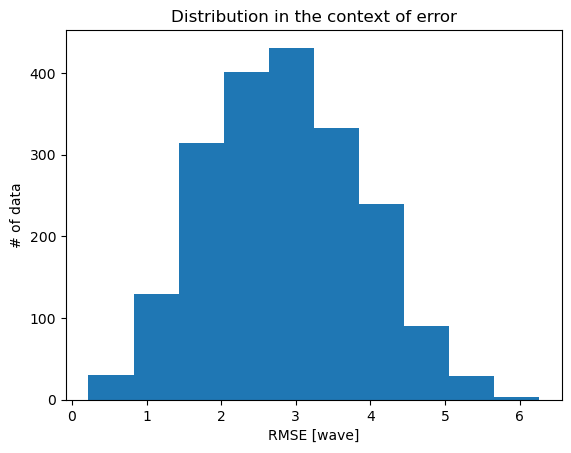

In [11]:
plt.hist(rmse_avg_before)
plt.title('Distribution in the context of error')
plt.xlabel('RMSE [wave]')
plt.ylabel('# of data')
plt.show()

In [13]:
avg = np.mean(rmse_avg_before)
max_value = np.max(rmse_avg_before)
min_value = np.min(rmse_avg_before)
std_ = np.std(rmse_avg_before)
print(avg, max_value,min_value,std_)

2.83773142 6.26232 0.2213 1.0293586785908901


## 알고리즘 결과 대입

In [17]:
avg_after = []
std_after = []
for i in range(len(answer)) :
    data_path = file_path + data_number[i]
    error = answer[i]
    pre = prediction[i]
    input_data = []
    for j in range(6) :
        a = float(error[j]) - float(pre[j])
        input_data.append(a)

    surf11 = TheSystem.LDE.GetSurfaceAt(11)
    surf11.Thickness = input_data[2]
    surf10 = TheSystem.LDE.GetSurfaceAt(10)
    surf10.GetCellAt(12).DoubleValue = input_data[0]
    surf10.GetCellAt(13).DoubleValue = input_data[1]
    surf10.GetCellAt(14).DoubleValue = input_data[3]
    surf10.GetCellAt(15).DoubleValue = input_data[4]
    surf10.GetCellAt(16).DoubleValue = input_data[5]
    
    rmse = []
    
    for field in range(5) :
        filed_number = field + 1
        
        # WFM
        Mywavefront = TheSystem.Analyses.New_Analysis(ZOSAPI.Analysis.AnalysisIDM.WavefrontMap)
        Mywavefront.WaitForCompletion()
        Mywavefront_settings = Mywavefront.GetSettings()

        Mywavefront_settings = ZOSAPI.Analysis.Settings.IAS_WavefrontMap(Mywavefront_settings)

    
        Mywavefront_settings.Field.SetFieldNumber(filed_number) #Field 설정
        Mywavefront_settings.RemoveTilt = True

        #RemoveTilt 설정
        Mywavefront.ApplyAndWaitForCompletion()
        Mywavefront_result = Mywavefront.GetResults()
        file_name_wfm = 'wfm(after)_' + str(filed_number) + '.txt'
        wfm_path = os.path.join(data_path,file_name_wfm)
        Mywavefront_result.GetTextFile(wfm_path)#Result file 추출
        Mywavefront.Close()
        
        f = open(wfm_path, 'r', encoding = 'utf-16')
        data = float(f.read().splitlines()[9].split()[8])
        rmse.append(data)
        
    avg_after.append(np.mean(rmse))
    std_after.append(np.std(rmse))
    
    surf11 = TheSystem.LDE.GetSurfaceAt(11)
    surf11.Thickness = 0
    surf10 = TheSystem.LDE.GetSurfaceAt(10)
    surf10.GetCellAt(12).DoubleValue = 0
    surf10.GetCellAt(13).DoubleValue = 0
    surf10.GetCellAt(14).DoubleValue = 0
    surf10.GetCellAt(15).DoubleValue = 0
    surf10.GetCellAt(16).DoubleValue = 0
    
    
        
    

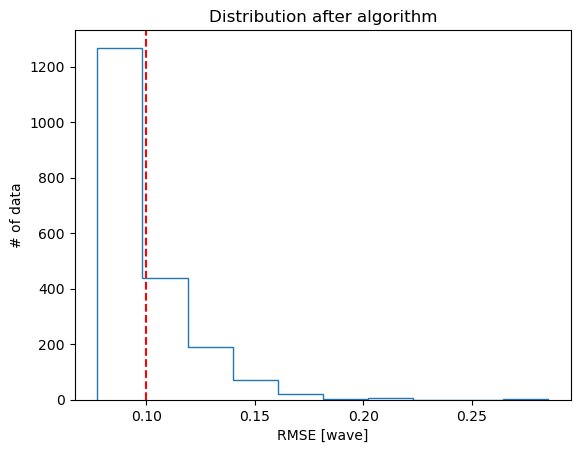

In [24]:
plt.axvline(x=0.1,ymin=0,ymax=1,color = 'red', linestyle = '--')
plt.hist(avg_after,histtype = 'step')
plt.title('Distribution after algorithm')
plt.xlabel('RMSE [wave]')
plt.ylabel('# of data')
plt.show()

In [19]:
avg_after_ = np.mean(avg_after)
max_value_after = np.max(avg_after)
min_value_after = np.min(avg_after)
std_after = np.std(avg_after)
print(avg_after_, max_value_after,min_value_after,std_after)

0.09926882 0.28528000000000003 0.0775 0.020545921410528172


In [25]:
over = []
for item in avg_after :
    if item > 0.1 :
        over.append(item)

print(len(over))

669
